In [ ]:
# Assumptions:

#     There are no outliers in data.
#     Sample size should be greater than the factor.
#     There should not be perfect multicollinearity.
#     There should not be homoscedasticity between the variables.


In [7]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv(r"C:\Users\basde\Downloads\playground-series-s3e24\train.csv")

In [14]:
# Ensure your data is properly preprocessed. This typically involves:

#     Handling Missing Values: Impute or remove them.

#     Scaling: Standardize or normalize your features, especially for PCA, as it's sensitive to scale.

features = df.drop(columns=['id', 'smoking'])

In [15]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [16]:
n_samples, n_features = scaled_data.shape
print(f"Scaled data shape: {n_samples} samples, {n_features} features.")
print("Data standardized successfully.")

Scaled data shape: 159256 samples, 24 features.
Data standardized successfully.


In [17]:
pca_actual = PCA(n_components=n_features) # Fit for all components
pca_actual.fit(scaled_data)
actual_eigenvalues = pca_actual.explained_variance_

print("Actual Eigenvalues (from your data):")
print(np.round(actual_eigenvalues, 4))

Actual Eigenvalues (from your data):
[4.7601 2.36   1.8017 1.502  1.4562 1.3181 1.0826 1.022  1.0006 0.9912
 0.9515 0.8507 0.7509 0.6178 0.5663 0.5507 0.5045 0.4467 0.4292 0.3452
 0.3042 0.2367 0.0901 0.061 ]


In [19]:
# This is the core of Parallel Analysis. 
# We generate multiple random datasets by permuting values within each column independently. 
# This destroys correlations while preserving marginal distributions. 
# Then, we perform PCA on each random dataset.n_iterations = 200 # Number of random datasets to generate. More iterations give more stable results.

n_iterations = 200 # Number of random datasets to generate. More iterations give more stable results.

In [20]:
random_eigenvalues = np.zeros((n_iterations, n_features))

In [22]:
for i in range(n_iterations):
    # Create a permuted dataset by shuffling each column independently
    permuted_data = np.zeros_like(scaled_data)
    for col in range(n_features):
        permuted_data[:, col] = np.random.permutation(scaled_data[:, col])

    # Perform PCA on the permuted data
    pca_random = PCA(n_components=n_features)
    pca_random.fit(permuted_data)
    random_eigenvalues[i, :] = pca_random.explained_variance_

mean_random_eigenvalues = np.mean(random_eigenvalues, axis=0)
print(f"\nMean Random Eigenvalues (across {n_iterations} iterations):")
print(np.round(mean_random_eigenvalues, 4))


Mean Random Eigenvalues (across 200 iterations):
[1.0219 1.0188 1.0163 1.0142 1.0123 1.0105 1.0088 1.0071 1.0055 1.0039
 1.0023 1.0008 0.9991 0.9975 0.996  0.9944 0.9928 0.9912 0.9894 0.9877
 0.9859 0.9839 0.9815 0.9785]


In [28]:
# Optional: You might also want to look at a percentile (e.g., 95th) for a more conservative estimate
# percentile_95_random_eigenvalues = np.percentile(random_eigenvalues, 95, axis=0)
# print(f"\n95th Percentile Random Eigenvalues:")
# print(np.round(percentile_95_random_eigenvalues, 4))


95th Percentile Random Eigenvalues:
[1.0246 1.021  1.0183 1.016  1.0141 1.0123 1.0103 1.0085 1.0069 1.0054
 1.0035 1.0023 1.0006 0.999  0.9975 0.9956 0.9942 0.9925 0.9908 0.9892
 0.9877 0.9858 0.9837 0.981 ]


In [24]:
# Compare Actual vs. Random Eigenvalues and Visualize

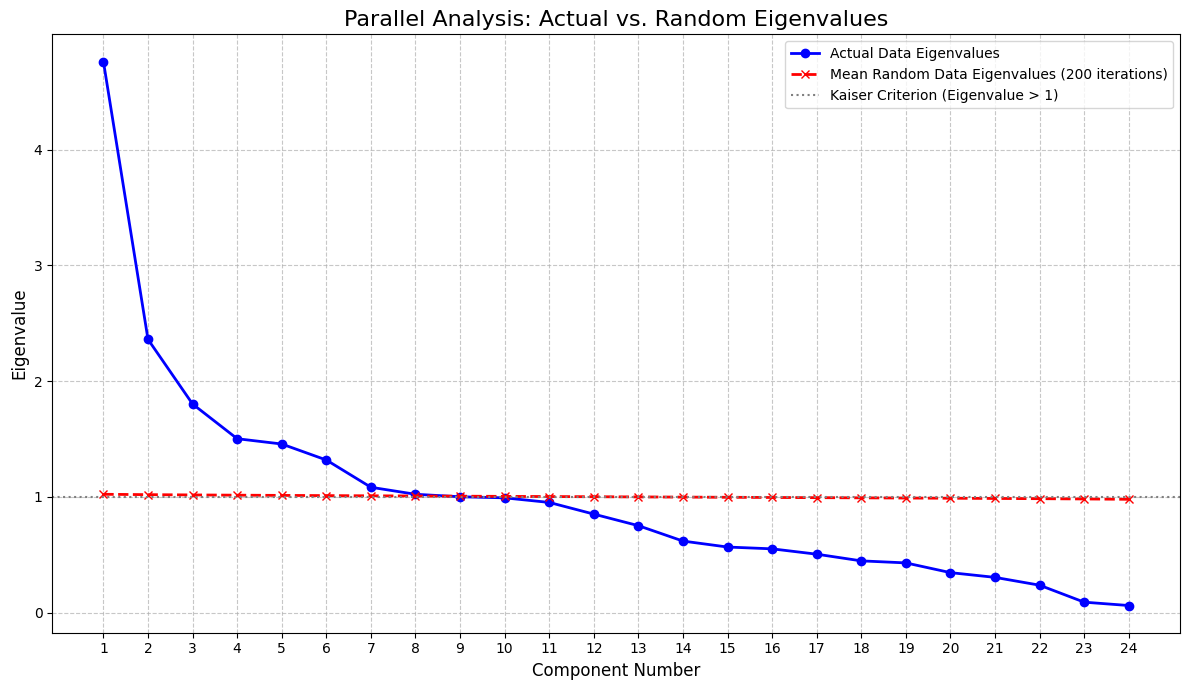

In [29]:
plt.figure(figsize=(12, 7))
plt.plot(range(1, n_features + 1), actual_eigenvalues,
         marker='o', linestyle='-', color='blue', linewidth=2,
         label='Actual Data Eigenvalues')
plt.plot(range(1, n_features + 1), mean_random_eigenvalues,
         marker='x', linestyle='--', color='red', linewidth=2,
         label=f'Mean Random Data Eigenvalues ({n_iterations} iterations)')
# Add Kaiser Criterion for reference (Eigenvalue > 1)
plt.axhline(y=1, color='gray', linestyle=':', label='Kaiser Criterion (Eigenvalue > 1)')

plt.title('Parallel Analysis: Actual vs. Random Eigenvalues', fontsize=16)
plt.xlabel('Component Number', fontsize=12)
plt.ylabel('Eigenvalue', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(1, n_features + 1))
plt.tight_layout()
plt.show()


In [26]:
n_components_to_retain = np.sum(actual_eigenvalues > mean_random_eigenvalues)

print(f"--- Parallel Analysis Results ---")
print(f"Based on Parallel Analysis, the recommended number of components to retain is: {n_components_to_retain}")


--- Parallel Analysis Results ---
Based on Parallel Analysis, the recommended number of components to retain is: 8


In [30]:
# Optional: If you used the 95th percentile for a more conservative estimate
# n_components_to_retain_95th = np.sum(actual_eigenvalues > percentile_95_random_eigenvalues)
# print(f"Based on Parallel Analysis (95th percentile), the recommended number of components is: {n_components_to_retain_95th}")

Based on Parallel Analysis (95th percentile), the recommended number of components is: 8


In [27]:
print("\nConsider this recommendation along with domain knowledge for your final decision.")


Consider this recommendation along with domain knowledge for your final decision.
